<a href="https://colab.research.google.com/github/Porxelek/Genarall_Work/blob/main/Tweet_analaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install squarify
!pip install chart-studio
!pip install geopandas
!pip3 install termcolor
!pip install pyLDAvis
!pip install plotly==3.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.6 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=494a8c60441ee42f230324635f37a41425f82f4f5973317e8b7e06ea2b2b235f
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 12.2 MB/s 
     |████████████████████████████████| 16.7 MB 258 kB/s 
     |████████████████████████████████| 6.3 MB 40.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/p

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import os
import string
import re
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

#PLOTLY
from termcolor import colored
import squarify
from chart_studio import plotly
import plotly.plotly as py
import plotly.offline as offline
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
from collections import defaultdict
from plotly import tools
from plotly.graph_objs import Scatter, Figure, Layout
cf.set_config_file(offline=True)
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import plotly.io as pio
pio.renderers.default = "colab"

from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
tr_stopwords = set(stopwords.words("turkish"))
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis.sklearn
from pylab import bone, pcolor, colorbar, plot, show, rcParams, savefig
import squarify

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working

/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df0 = pd.read_json("/content/drive/MyDrive/Data/deneme.json", lines=True)
df = pd.DataFrame(df0.copy())

In [5]:
df.shape

(42821, 36)

In [6]:
df.head(3).T

,0,1,2
id,1565674777792102400,1565674720267231232,1565674680157077504
conversation_id,1565662890388033536,1565674720267231232,1565662890388033536
created_at,2022-09-02 15:15:30 Turkey Standard Time,2022-09-02 15:15:16 Turkey Standard Time,2022-09-02 15:15:07 Turkey Standard Time
date,2022-09-02 00:00:00,2022-09-02 00:00:00,2022-09-02 00:00:00
time,15:15:30,15:15:16,15:15:07
timezone,300,300,300
user_id,1452305859556651016,1197131521703976961,730616797
username,ersin_sarigl2,cengizfatihzyu1,busrakalkann
name,Ersin Sarigül,Cengiz Fatih Özyurt,Büşra Kalkan
place,,,


In [7]:
df.sample(5).T

,27366,15644,10084,31494,29353
id,1566357900569755648,1564638536988508161,1565380747812290560,1565823061689077762,1566077446058901505
conversation_id,1566357900569755648,1564638536988508160,1564688459901685760,1565823061689077760,1566077446058901504
created_at,2022-09-04 12:29:59 Turkey Standard Time,2022-08-30 18:37:51 Turkey Standard Time,2022-09-01 19:47:08 Turkey Standard Time,2022-09-03 01:04:44 Turkey Standard Time,2022-09-03 17:55:34 Turkey Standard Time
date,2022-09-04 00:00:00,2022-08-30 00:00:00,2022-09-01 00:00:00,2022-09-03 00:00:00,2022-09-03 00:00:00
time,12:29:59,18:37:51,19:47:08,01:04:44,17:55:34
timezone,300,300,300,300,300
user_id,726069921130643456,4565505374,147171900,822424773603037185,1432762513360359432
username,gzegitimdunyasi,ssoylu19,erhan42uzun,alpcanitez,sukran2934
name,Gaziantep Egitim,Sümeyye G. Soylu,erhan uzun,Canıtez Alp,şükran
place,,,,,


In [8]:
df.tail()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
42816,1563089514205106177,1563089514205106176,2022-08-26 12:02:35 Turkey Standard Time,2022-08-26,12:02:35,300,1554772130805518338,herteknoloji,HerTeknoloji,,İmam Hatiplilerin Teknofest 2021'deki başarısı...,tr,[],[https://herteknoloji.com/imam-hatiplilerin-te...,[],0,0,0,[],[],https://twitter.com/HerTeknoloji/status/156308...,False,,0,,,,,,,,[],,,,
42817,1563088420762632194,1563088420762632192,2022-08-26 11:58:14 Turkey Standard Time,2022-08-26,11:58:14,300,1528838871047446529,erkanngulcicekk,Erkan Gülçiçek,,@kilicdarogluk bay Kemal @teknofest 'e gele...,tr,"[{'screen_name': 'teknofest', 'name': 'teknofe...",[],[],0,0,0,[],[],https://twitter.com/Erkanngulcicekk/status/156...,False,,0,,,,,,,,[],,,,
42818,1563086614158782466,1563086614158782464,2022-08-26 11:51:04 Turkey Standard Time,2022-08-26,11:51:04,300,922891473460264961,19mayisbld,19 Mayıs Belediyesi,,TEKNOFEST Rüzgârı Karadeniz’den Esiyor. 🤩🌊🚀 B...,tr,"[{'screen_name': 'samsunbsb', 'name': 'samsun ...",[],[https://pbs.twimg.com/media/FbEy_fsWIAAz9n4.jpg],0,0,5,[],[],https://twitter.com/19MayisBld/status/15630866...,False,,1,https://pbs.twimg.com/media/FbEy_fsWIAAz9n4.jpg,,,,,,,[],,,,
42819,1563086038112751616,1563086038112751616,2022-08-26 11:48:46 Turkey Standard Time,2022-08-26,11:48:46,300,1541448781,samsunhaber_smg,Samsun Gazetesi - Samsun Haber - Son Dakika,,Samsun Haber | Samsun'da TEKNOFEST teyakkuzu: ...,tr,[],[https://www.samsungazetesi.com/samsun-haber-s...,[https://pbs.twimg.com/media/FbEydJjWAAADq_e.jpg],0,0,0,"[samsun, samsunhaber]",[],https://twitter.com/samsunhaber_smg/status/156...,False,,1,https://pbs.twimg.com/media/FbEydJjWAAADq_e.jpg,,,,,,,[],,,,
42820,1563086002935459844,1563086002935459840,2022-08-26 11:48:38 Turkey Standard Time,2022-08-26,11:48:38,300,380327620,osmanaslan5860,Dr. Osman ASLAN 🇹🇷,,"""Batı kültür endüstrisi geldiği nokta itibariy...",tr,"[{'screen_name': 'alisatantarih', 'name': 'ali...",[],[https://pbs.twimg.com/media/FbEyb3iWQAAxLMX.jpg],0,0,6,[],[],https://twitter.com/OsmanAslan5860/status/1563...,False,,1,https://pbs.twimg.com/media/FbEyb3iWQAAxLMX.jpg,,,,,,,[],,,,


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42821 entries, 0 to 42820
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               42821 non-null  int64         
 1   conversation_id  42821 non-null  int64         
 2   created_at       42821 non-null  object        
 3   date             42821 non-null  datetime64[ns]
 4   time             42821 non-null  object        
 5   timezone         42821 non-null  int64         
 6   user_id          42821 non-null  int64         
 7   username         42821 non-null  object        
 8   name             42821 non-null  object        
 9   place            42821 non-null  object        
 10  tweet            42821 non-null  object        
 11  language         42821 non-null  object        
 12  mentions         42821 non-null  object        
 13  urls             42821 non-null  object        
 14  photos           42821 non-null  objec

In [10]:
df.drop_duplicates(subset=['conversation_id', 'id','user_id'], keep='first', inplace= True)

In [11]:
df.shape

(16133, 36)

In [12]:
df.isnull().sum()

id                 0
conversation_id    0
created_at         0
date               0
time               0
timezone           0
user_id            0
username           0
name               0
place              0
tweet              0
language           0
mentions           0
urls               0
photos             0
replies_count      0
retweets_count     0
likes_count        0
hashtags           0
cashtags           0
link               0
retweet            0
quote_url          0
video              0
thumbnail          0
near               0
geo                0
source             0
user_rt_id         0
user_rt            0
retweet_id         0
reply_to           0
retweet_date       0
translate          0
trans_src          0
trans_dest         0
dtype: int64

In [13]:
print(f" İlk atılan tweet {df.created_at.min()}")
print(f" Son atılan tweer {df.created_at.max()}")

 İlk atılan tweet 2022-08-26 11:48:38 Turkey Standard Time
 Son atılan tweer 2022-09-04 15:50:10 Turkey Standard Time


In [14]:
print('İlk tweeti ',df.loc[df['created_at'] == '2022-08-26 11:48:38 Turkey Standard Time', 'name'].values,"atmıştır.")

İlk tweeti  ['Dr. Osman ASLAN 🇹🇷'] atmıştır.


In [15]:
df['created_at'] = df['created_at'].str.split(" ").str[0]

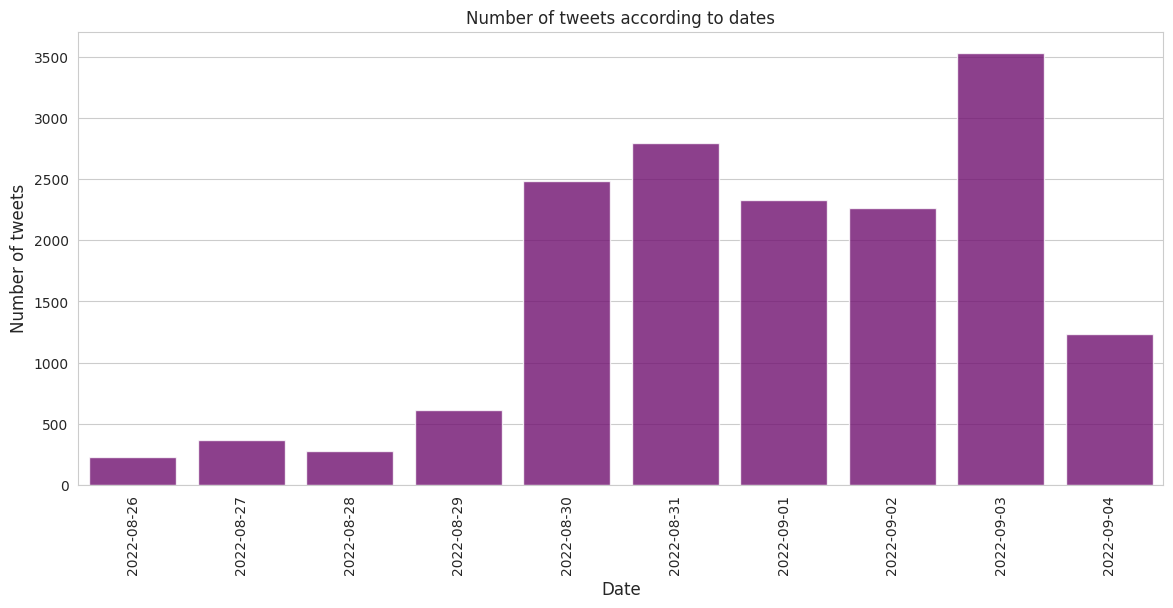

In [16]:

df['created_at'] =  pd.to_datetime(df['created_at'])
cnt_srs = df['created_at'].dt.date.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='purple')
plt.xticks(rotation='vertical')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.title("Number of tweets according to dates")
plt.show()

In [17]:
cnt_ = df['created_at'].value_counts()
cnt_ = cnt_.sort_index() 
fig = {
  "data": [
    {
      "values": cnt_.values,
      "labels": cnt_.index,
      "domain": {"x": [0, .5]},
      "name": "Number of tweets per day",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
                "x": 0.50,
                "y": 1
            },
        ]
    }
}
iplot(fig)
cnt_

2022-08-26     229
2022-08-27     367
2022-08-28     272
2022-08-29     615
2022-08-30    2489
2022-08-31    2796
2022-09-01    2333
2022-09-02    2265
2022-09-03    3530
2022-09-04    1237
Name: created_at, dtype: int64

In [18]:
x = 0.
y = 0.
width = 150.
height = 300.
type_list = list(df['created_at'].unique())
values = [len(df[df['created_at'] == i]) for i in type_list]

normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

color_brewer = ['#2D3142','#4F5D75','#BFC0C0','#F2D7EE','#EF8354','#839788','#EEE0CB']
shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append( 
        dict(
            type = 'rect', 
            x0 = r['x'], 
            y0 = r['y'], 
            x1 = r['x']+r['dx'], 
            y1 = r['y']+r['dy'],
            line = dict( width = 2 ),
            fillcolor = color_brewer[counter]
        ) 
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = "{}-{}".format(type_list[counter], values[counter]),
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(color_brewer):
        counter = 0

# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects ], 
    y = [ r['y']+(r['dy']/2) for r in rects ],
    text = [ str(v) for v in values ], 
    mode = 'text',
)
        
layout = dict(
    height=700, 
    width=700,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest',
    font=dict(color="#FFFFFF")
)

# With hovertext
figure = dict(data=[trace0], layout=layout)
iplot(figure, filename='squarify-treemap')

In [19]:
cnt_ = df['time'].value_counts()
cnt_ = cnt_.sort_index() 
trace1 = go.Scatter(
                    x = cnt_.index,
                    y = cnt_.values,
                    mode = "lines",
                    name = "citations",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)')
                    )

data = [trace1]
layout = dict(title = 'Number of tweets per hour',
              xaxis= dict(title= 'Tweets per hour',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [20]:
#most favourite and retweeted tweet
print(f" En çok retweet edilen tweetin retweet sayısı {df.retweets_count.max()}")
print(f" En çok Beğenilen tweetin beğeni sayısı {df.likes_count.max()}")

 En çok retweet edilen tweetin retweet sayısı 7552
 En çok Beğenilen tweetin beğeni sayısı 33660


In [21]:
# En çok retweet edilen tweet sahibi
df.loc[df['retweets_count']==7552,'name'].values

array(['Recep Tayyip Erdoğan'], dtype=object)

In [22]:
# En çok Beğenilen tweet tweet sahibi
df.loc[df['likes_count']== 33660,'name'].values

array(['Recep Tayyip Erdoğan'], dtype=object)

In [23]:
# En çok retweet edilen tweet
df.loc[df['retweets_count']==7552,'tweet'].values

array(['Millî teknoloji hamlemizin lokomotifi, yeni ufuklara açılmanın, geleceği tasarlamanın, en yeni teknolojilerin festivali...  Yarın ben de gençlerimizle birlikte TEKNOFEST Samsun’da olacağım… 🇹🇷  https://t.co/JTmrkb2029'],
      dtype=object)

In [24]:
# En çok Beğenilen tweet
df.loc[df['likes_count']== 33660,'tweet'].values

array(['Millî teknoloji hamlemizin lokomotifi, yeni ufuklara açılmanın, geleceği tasarlamanın, en yeni teknolojilerin festivali...  Yarın ben de gençlerimizle birlikte TEKNOFEST Samsun’da olacağım… 🇹🇷  https://t.co/JTmrkb2029'],
      dtype=object)

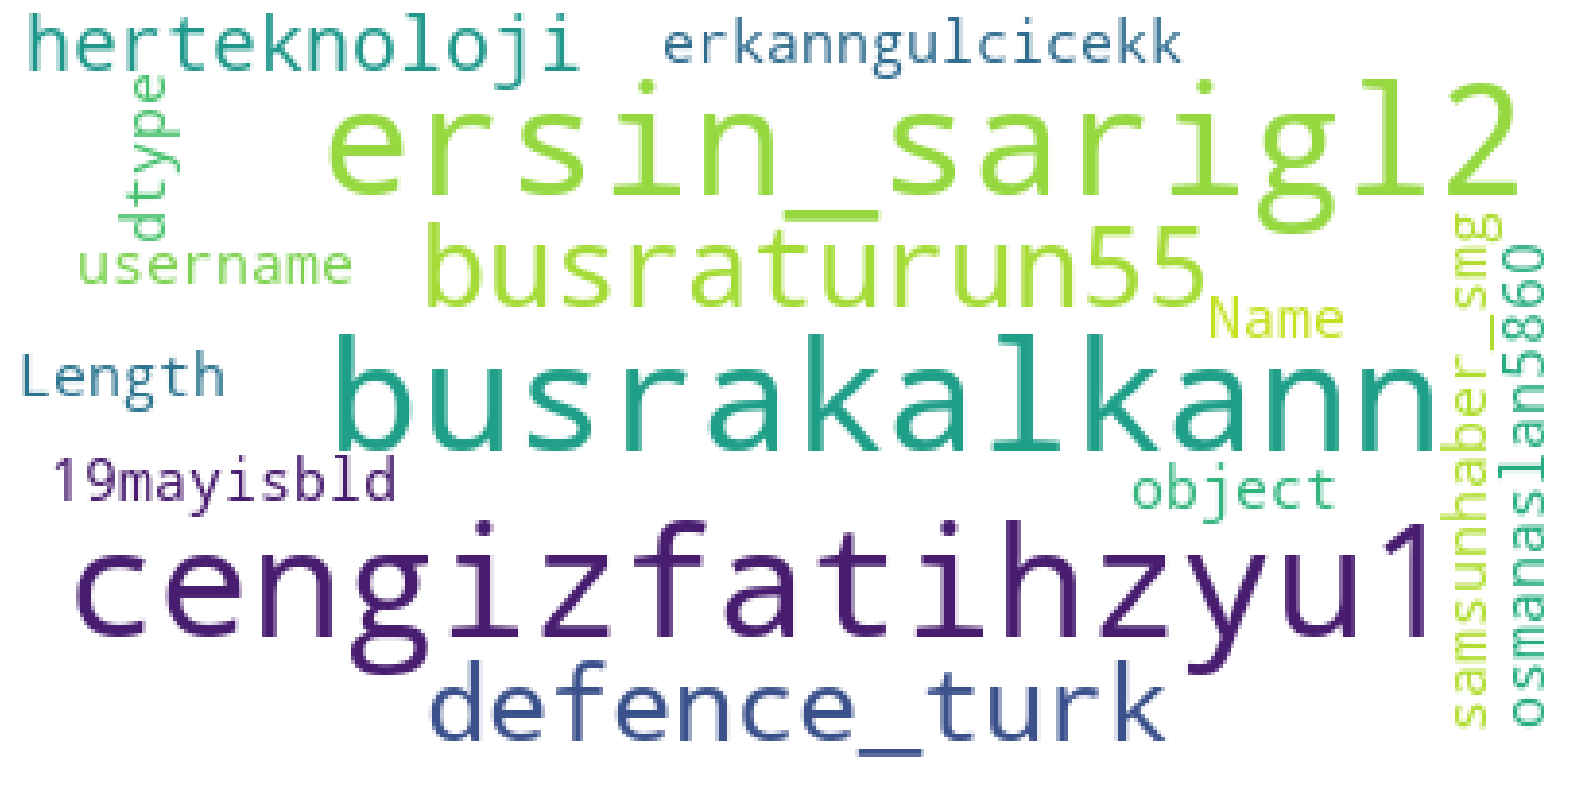

In [45]:
wordcloud__ = WordCloud(
                          background_color='white',
                          stopwords=set(STOPWORDS),
                          max_words=250,
                          max_font_size=40, 
                          random_state=1705
                         ).generate(str(df['username'].dropna()))
def cloud_plot(wordcloud):
    fig = plt.figure(1, figsize=(20,15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

wordcloud__.to_file('user.png')
cloud_plot(wordcloud__)

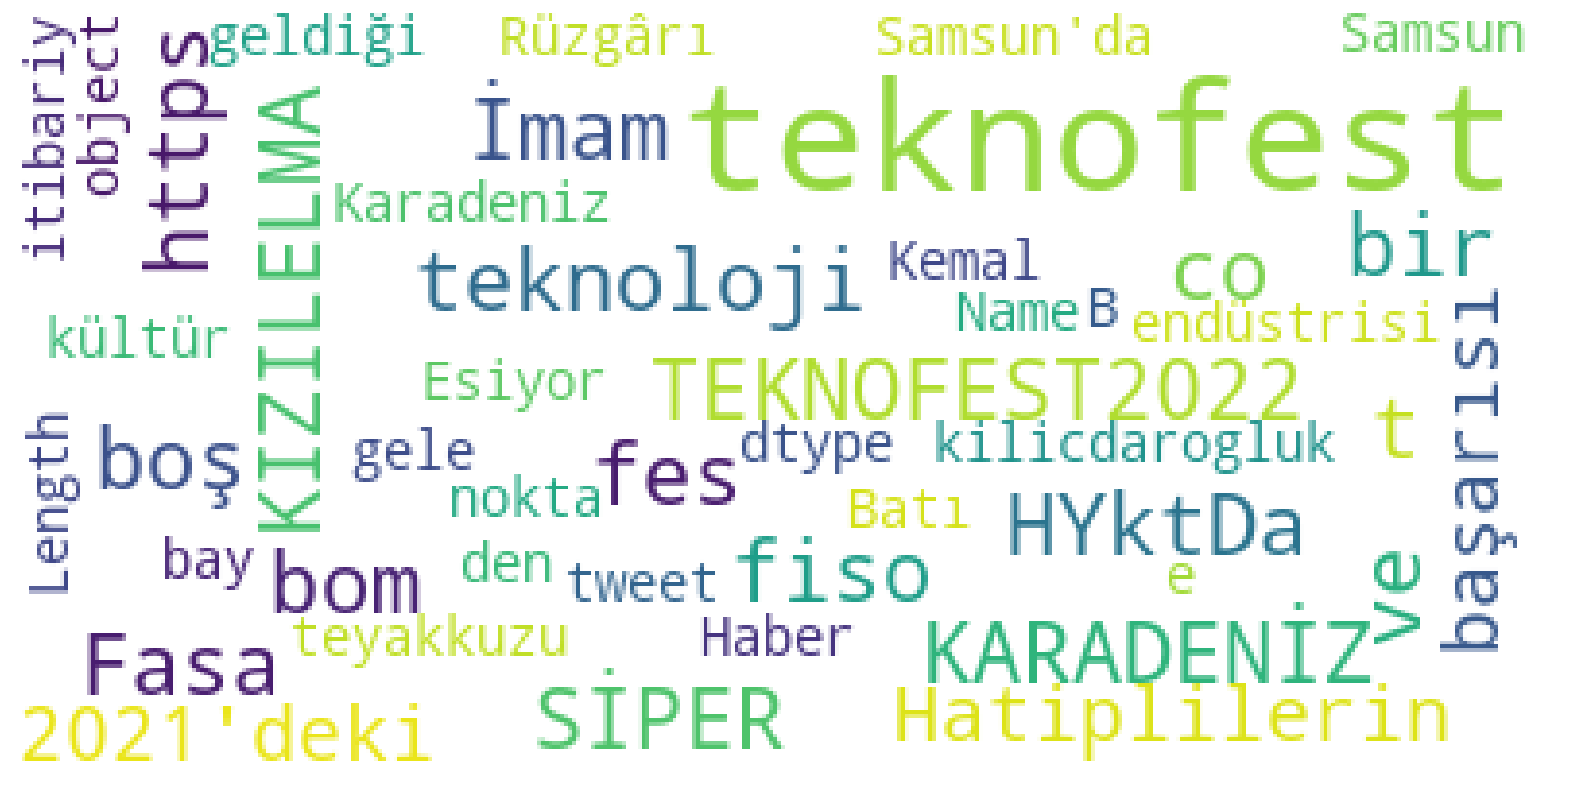

In [48]:
#wordcloud
wordcloud_ = WordCloud(
                          background_color='white',
                          stopwords=set(STOPWORDS),
                          max_words=250,
                          max_font_size=40, 
                          random_state=1705
                         ).generate(str(df['tweet'].dropna()))
def cloud_plot(wordcloud):
    fig = plt.figure(1, figsize=(20,15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
wordcloud_.to_file('word.png')
cloud_plot(wordcloud_)

In [27]:
df['sentiment'] = df['tweet'].map(lambda text: TextBlob(text).sentiment.polarity)

In [28]:
print("5 random tweets with highest positive sentiment polarity: \n")
cL = df.loc[df.sentiment==1, ['tweet']].sample(5).values
for c in cL:
    print(c[0])
    print()

5 random tweets with highest positive sentiment polarity: 

@teknofest Maşallah. Disiplin hat safhada. Namazdan sonra da ürettiklerini masada bulamazsan şaşırma. :D

@TBaranjre @teknofest "Yaw biraz oynayıp geri getirecekler çocuklar." :D  https://t.co/r8KKnfeHmk

Cumhurbaşkanlığı Yatırım Ofisi Başkanı Sayın Burak Dağlıoğlu #TEKNOFEST Karadeniz'de BEST For Energy standımızı ziyaret ederek Ajansımız tarafından temiz enerji alanında gerçekleştirilen çalışmaların başarılı sonuçlarını yakından takip ettiklerini ifade etti.  https://t.co/143MKojq0J

Teknofest'te sola türk gösterisi, dosta güven, düşmana ve 3 yaşındaki yeğenime korku saldı. Not: altına işedi :D

@thomasyeniden Aga hazır gündem Teknofest iken şu MIUS, MMU, TB3 gibi projeler hakkında birşeyler yazsan yav. Ne olur, nelere yol açar falan ne bilim bahset yani zahmet olmazsa :D



In [29]:
print("5 random tweets with highest nagative sentiment polarity: \n")
cL = df.loc[df.sentiment== int(-1), ['tweet']].sample(1, replace= True).values
for c in cL:
    print(c[0])
    print()

5 random tweets with highest nagative sentiment polarity: 

Teknofest genşliğine 79 sene sonrasını büyük bir çoğunluğunun göremeyecek olması şoku :'(  https://t.co/bT6OiuNnJ4



In [30]:
print("5 random tweets with neutral sentiment polarity: \n")
cL = df.loc[df.sentiment==0, ['tweet']].sample(5).values
for c in cL:
    print(c[0])
    print()

5 random tweets with neutral sentiment polarity: 

Cumhurbaşkanı Erdoğan: Yarın ben de gençlerimizle birlikte Teknofest Samsun'da olacağım   https://t.co/xDqzoKvliO

@Aydin_MEM @seyfullah0966 @tcmeb @ValiAKSOY @meb_ogm @teknofest Tebrikler

@teknofest Ak parti cumhur ıtifakı ve Liderimiz Başkomutan Erdoğan ülkemizin geleceği ve umududur. 21 yılda ülkemizi 4 kat büyülten bir üst akıla  sahip çıkıp desdek verecegiz

Size de #TEKNOFEST yaşattım 😂🙈  https://t.co/VaPZZcbpC1

“Otomotiv Sektöründe Envanter Doğrulama Sürecinin Web Tabanlı Dijitalizasyonu” başlıklı projeleriyle birincilik ödülüne layık görülen takımımız ödülünü Cumhurbaşkanımız Sayın Recep Tayyip ERDOĞAN’ın elinden aldı.  @Teknofest #estü #t3vakfı #Teknofest #eskisehirteknikuniversitesi  https://t.co/qJ5vRu4B7v



In [31]:
trace1 = go.Histogram(
    x = df['sentiment'],
    opacity=0.75,
    name = "Sentiment",
    marker=dict(color='rgba(122, 75, 196, 0.6)'))

data = [trace1]
layout = go.Layout(barmode='overlay',
                   title='Histogram plot of sentiment',
                   xaxis=dict(title='Sentiment'),
                   yaxis=dict( title='Count'),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [32]:
cut = pd.cut(
    df['sentiment'],
    [-np.inf, -.01, .01, np.inf],
    labels=['negative', 'neutral', 'positive']
)
df['polarity'] = cut.values
df[['polarity','sentiment']][:20]

,polarity,sentiment
0,neutral,0.00
1,neutral,0.00
2,neutral,0.00
3,neutral,0.00
4,neutral,0.00
5,neutral,0.00
6,neutral,0.00
7,neutral,0.00
8,neutral,0.00
9,positive,0.60


In [33]:
df['polarity'].value_counts()

neutral     15734
positive      297
negative      102
Name: polarity, dtype: int64

In [34]:
data = [go.Scatterpolar(
  r = [df['polarity'].value_counts()[0],df['polarity'].value_counts()[1],df['polarity'].value_counts()[2]],
  theta = list(df['polarity'].unique()),
  fill = 'toself'
)]

layout = go.Layout(
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [0, 60000]
    )
  ),
  showlegend = False,
  title ='Radar chart of polarities'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename = "Single Pokemon stats")

In [35]:
stopwords.words('turkish')

['acaba',
 'ama',
 'aslında',
 'az',
 'bazı',
 'belki',
 'biri',
 'birkaç',
 'birşey',
 'biz',
 'bu',
 'çok',
 'çünkü',
 'da',
 'daha',
 'de',
 'defa',
 'diye',
 'eğer',
 'en',
 'gibi',
 'hem',
 'hep',
 'hepsi',
 'her',
 'hiç',
 'için',
 'ile',
 'ise',
 'kez',
 'ki',
 'kim',
 'mı',
 'mu',
 'mü',
 'nasıl',
 'ne',
 'neden',
 'nerde',
 'nerede',
 'nereye',
 'niçin',
 'niye',
 'o',
 'sanki',
 'şey',
 'siz',
 'şu',
 'tüm',
 've',
 'veya',
 'ya',
 'yani']

In [36]:
df0['count_sent']=df["tweet"].apply(lambda x: len(re.findall("\n",str(x)))+1)
#Word count in each comment:
df['count_word']=df["tweet"].apply(lambda x: len(str(x).split()))
#Unique word count
df['count_unique_word']=df["tweet"].apply(lambda x: len(set(str(x).split())))
#Letter count
df['count_letters']=df["tweet"].apply(lambda x: len(str(x)))
#punctuation count
df["count_punctuations"] =df["tweet"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
#upper case words count
df["count_words_upper"] = df["tweet"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
#title case words count
df["count_words_title"] = df0["tweet"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
#Number of stopwords
df["count_stopwords"] = df["tweet"].apply(lambda x: len([w for w in str(x).lower().split() if w in tr_stopwords]))
#Average length of the words
df["mean_word_len"] = df["tweet"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,16133.00,1565293040399454976.00,735274826395714.88,1563086002935459840.00,1564732177870356480.00,1565316150560526336.00,1566006671515783168.00,1566408276023074816.00
conversation_id,16133.00,1564793314050360832.00,16893062033213448.00,451062691793498112.00,1564699772451184640.00,1565290488726528000.00,1565989164251742208.00,1566408276023074816.00
timezone,16133.00,300.00,0.00,300.00,300.00,300.00,300.00,300.00
user_id,16133.00,699957762960692608.00,642538782624936960.00,6785912.00,807113467.00,887742723444420608.00,1338742505043603456.00,1566331989845835776.00
replies_count,16133.00,1.72,37.91,0.00,0.00,0.00,0.00,3441.00
retweets_count,16133.00,9.00,99.84,0.00,0.00,0.00,1.00,7552.00
likes_count,16133.00,50.82,499.80,0.00,0.00,1.00,8.00,33660.00
video,16133.00,0.43,0.50,0.00,0.00,0.00,1.00,1.00
sentiment,16133.00,0.00,0.08,-1.00,0.00,0.00,0.00,1.00
count_word,16133.00,16.54,10.42,1.00,8.00,14.00,25.00,53.00


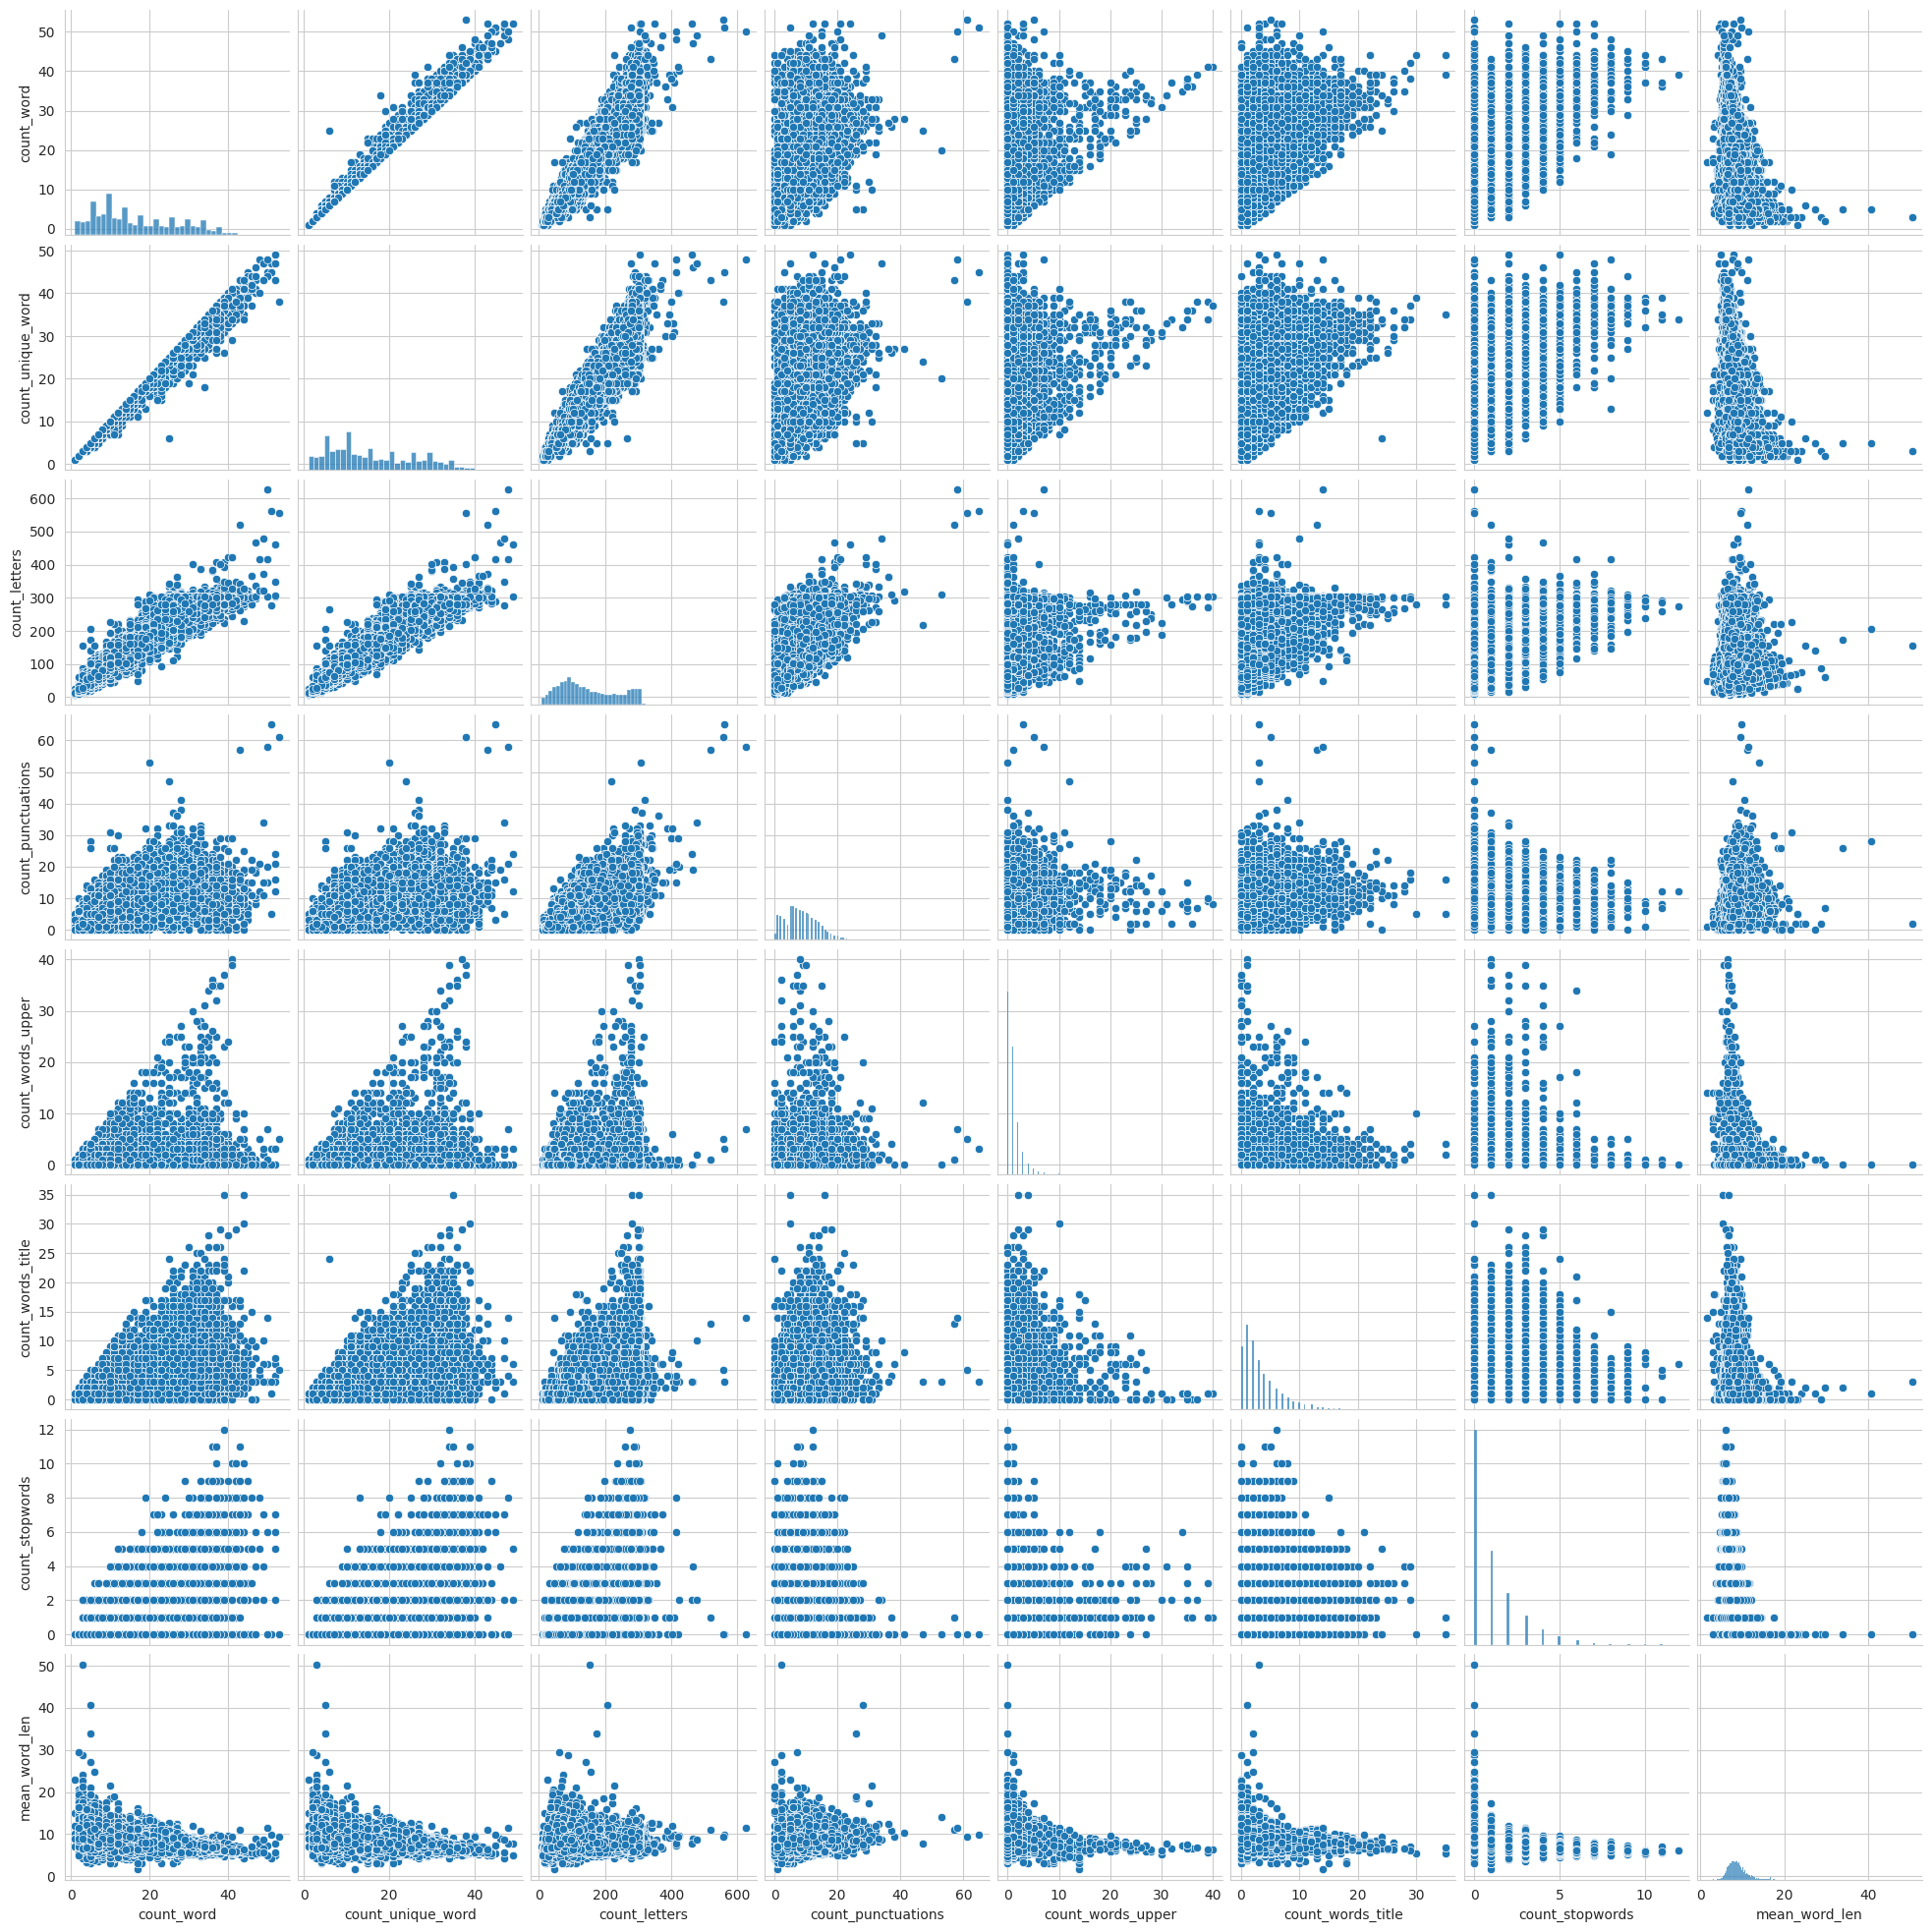

In [38]:
sample_df = df[['count_word','count_unique_word','count_letters','count_punctuations','count_words_upper','count_words_title','count_stopwords','mean_word_len' ]]
sns.pairplot(sample_df,palette="husl")
del sample_df

In [39]:
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace


freq_dict = defaultdict(int)
for sent in df["tweet"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')


fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words"
                                          ])
fig.append_trace(trace0, 1, 1)

fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots.html')

This is the format of your plot grid:
[ (1,1) x1,y1 ]



/usr/local/lib/python3.7/dist-packages/plotly/basedatatypes.py:1606: DeprecationWarning:

The append_trace method is deprecated and will be removed in a future version.
Please use the add_trace method with the row and col parameters.




In [40]:
freq_dict = defaultdict(int)
for sent in df["tweet"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'orange')

fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent bigrams"
                                          ])
fig.append_trace(trace0, 1, 1)
fig['layout'].update(height=1200, width=1000, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots")
iplot(fig, filename='word-plots')

This is the format of your plot grid:
[ (1,1) x1,y1 ]



/usr/local/lib/python3.7/dist-packages/plotly/basedatatypes.py:1606: DeprecationWarning:

The append_trace method is deprecated and will be removed in a future version.
Please use the add_trace method with the row and col parameters.




In [41]:
cnt_ = df['place'].value_counts()
cnt_.reset_index()
cnt_ = cnt_[:20,]
trace1 = go.Bar(
                x = cnt_.index,
                y = cnt_.values,
                name = "Number of tweets on Türkiye polls by state.",
                marker = dict(color = 'rgba(200, 74, 55, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                annot
                )

data = [trace1]
layout = go.Layout(barmode = "group",title = 'Number of tweets on Türkiye polls by state.')
fig = go.Figure(data = data, layout = layout)
iplot(fig)